In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime 


ANOVA
On effectue une analyse de variance pour mesurer l'indépendance entre une varaible qualitative et une variable quantitative
Dans notre cas, la variable quantitative est l'année, le mois ou la semaine de transaction, la variable quantitative est quant à elle tx_amount. 

In [23]:
df_A=pd.read_csv("/Users/corentinpla/Documents/C-2-Statap/transactions_A.csv")
df_B=pd.read_csv("/Users/corentinpla/Documents/C-2-Statap/transactions_B.csv")

df_A["df_type"]="A"
df_B["df_type"]="B"

In [21]:
df_A.head()

,tx_id,sender_account_id,receiver_account_id,tx_amount,timestamp,tx_type,sender_bank_id,sender_first_name,sender_last_name,sender_country_code,...,sender_zip_code,receiver_bank_id,receiver_first_name,receiver_last_name,receiver_country_code,receiver_birth_date,receiver_zip_code,is_alert_solo,is_alert_pooled,df_type
0,3109,6822.0,NaN,229.97,2018-03-03,WIRE,A,Marie,Lee,FR,...,27800,C,Maritn,Alvarez,FR,1930-08-29,89160,False,False,A
1,1829,NaN,9011.0,117.83,2018-03-03,WIRE,B,Kurt,Brignac,FR,...,35660,A,Joseph,Gable,FR,1933-12-23,62116,False,False,A
2,1830,NaN,7140.0,117.83,2018-03-03,WIRE,B,Kurt,Brignac,FR,...,35660,A,Shelley,Spencer,FR,1944-12-23,34360,False,False,A
3,1831,NaN,1822.0,526.02,2018-03-03,WIRE,C,Shelly,Jethva,CN,...,65230,A,Ambrose,Cole,FR,1958-04-07,3800,False,False,A
4,1832,5390.0,NaN,35.79,2018-03-03,WIRE,A,Judy,James,FR,...,42140,C,Jose,Fiume,FR,1981-08-28,66820,False,False,A


In [24]:
df_concat=pd.concat([df_A,df_B])

In [28]:
df_concat.dtypes

tx_id                      int64
sender_account_id        float64
receiver_account_id      float64
tx_amount                float64
timestamp                 object
tx_type                   object
sender_bank_id            object
sender_first_name         object
sender_last_name          object
sender_country_code       object
sender_birth_date         object
sender_zip_code            int64
receiver_bank_id          object
receiver_first_name       object
receiver_last_name        object
receiver_country_code     object
receiver_birth_date       object
receiver_zip_code          int64
is_alert_solo               bool
is_alert_pooled             bool
df_type                   object
dtype: object

In [11]:
df_A["sender_country_code"].head(50)

0     FR
1     FR
2     FR
3     CN
4     FR
5     FR
6     FR
7     FR
8     FR
9     FR
10    FR
11    FR
12    FR
13    FR
14    FR
15    FR
16    FR
17    FR
18    FR
19    FR
20    FR
21    FR
22    FR
23    FR
24    FR
25    FR
26    FR
27    FR
28    FR
29    FR
30    FR
31    FR
32    FR
33    FR
34    FR
35    FR
36    FR
37    FR
38    FR
39    FR
40    FR
41    FR
42    FR
43    FR
44    FR
45    FR
46    FR
47    FR
48    FR
49    FR
Name: sender_country_code, dtype: object

In [17]:
def get_week_of_the_year(s):
    year=int(s[0:4])
    month=int(s[5:7])
    day=int(s[8:10])

    return(datetime.date(year, month, day).isocalendar().week)
    

def get_week(s):
    year=int(s[0:4])
    week=get_week_of_the_year(s)

    return((year-2018)*52+week)
    

def get_month_of_the_year(s):
    return(int(s[5:7]))
    

def get_month(s):
    month=get_month_of_the_year(s)
    year=int(s[0:4])
    
    return((year-2018)*12+month)

def get_year(s):
    year=s[:4]

    return(int(year))



In [19]:

df_A["week"]=df_A["timestamp"].apply(lambda x:get_week(x))
df_A["week_year"]=df_A["timestamp"].apply(lambda x:get_week_of_the_year(x))
df_A["month"]=df_A["timestamp"].apply(lambda x:get_month(x))
df_A["month_year"]=df_A["timestamp"].apply(lambda x:get_month_of_the_year(x))
df_A["year"]=df_A["timestamp"].apply(lambda x:get_year(x))


In [26]:
df_test=df_A.sample(n=10000)

In [33]:
df_concat["sender_country_code"].drop_duplicates()


0        FR
3        CN
139      BR
241      IN
245      TH
         ..
582      MA
2300     BG
7287     IL
8108     BI
12676    SS
Name: sender_country_code, Length: 80, dtype: object

In [ ]:
#uniquement pour graphiques
def select_sender_country_code(df):
    for x in df["sender_country_code"].drop_duplicates():
        
        
    

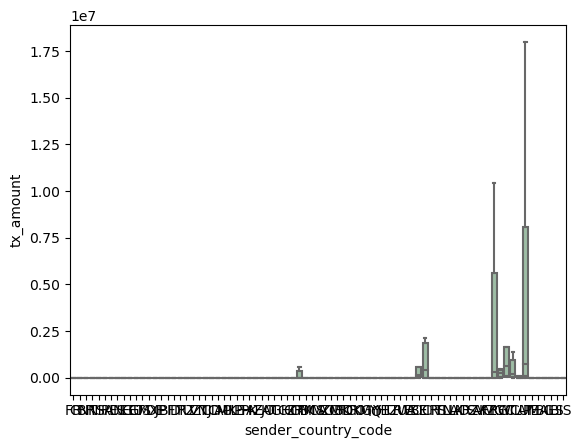

In [31]:
ax = sns.boxplot(x='sender_country_code', y='tx_amount', data=df_concat, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

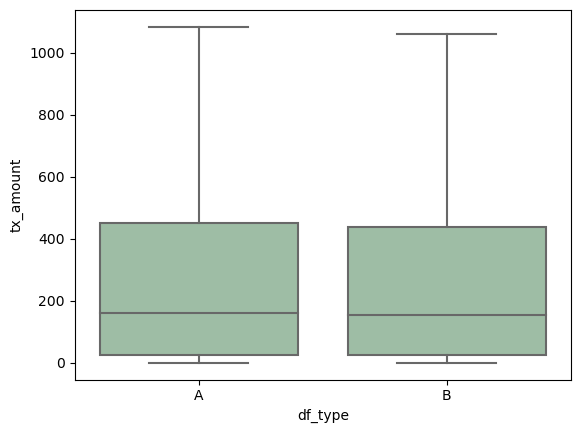

In [25]:
ax = sns.boxplot(x='df_type', y='tx_amount', data=df_concat, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

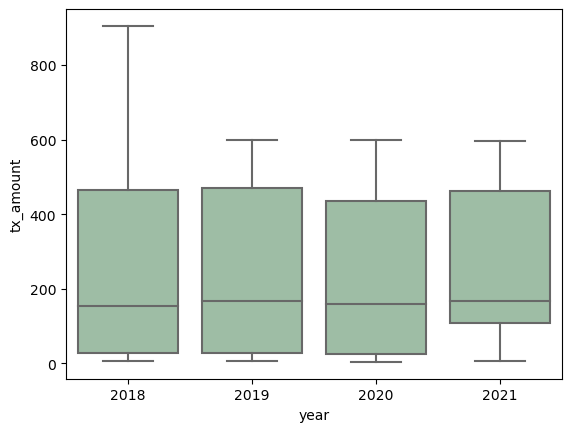

In [28]:
ax = sns.boxplot(x='year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

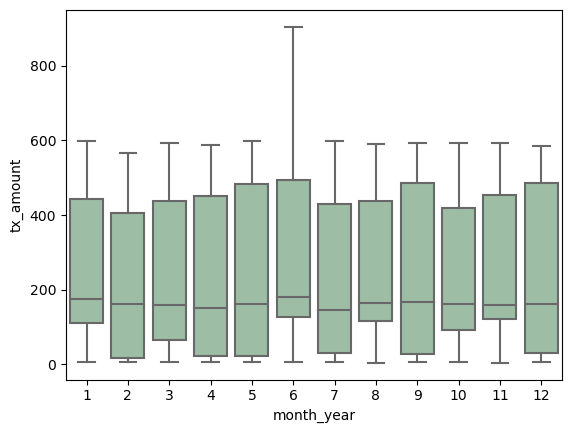

In [30]:
ax = sns.boxplot(x='month_year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

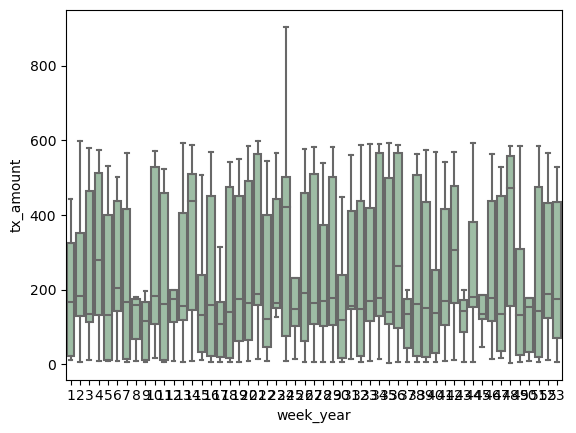

In [31]:
ax = sns.boxplot(x='week_year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

In [32]:
#year
model = ols('tx_amount ~ year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq     df          F    PR(>F)
year      4.658927e+13    1.0  14.223348  0.000172
Residual  3.268998e+15  998.0        NaN       NaN


Interprétation : on remarque que la p-valeur du test (lequel) vérifie p<0.05, on en conclu qu'il existe une différence significative entre les différentes catégories (ici les années)

In [33]:
#month
model = ols('tx_amount ~ month_year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq     df         F    PR(>F)
month_year  3.757673e+12    1.0  1.132352  0.287532
Residual    3.311829e+15  998.0       NaN       NaN


Interprétation : on remarque que la p-valeur du test est élevée (p=0,28), on en conclu qu'il existe une différence significative entre les différentes catégories (ici les mois de l'année).

In [34]:
#week
model = ols('tx_amount ~ week_year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df         F    PR(>F)
week_year  2.609324e+12    1.0  0.786032  0.375516
Residual   3.312978e+15  998.0       NaN       NaN


Interprétation : on remarque que la p-valeur du test est élevée (p=0,28), on en conclu qu'il existe une différence significative entre les différentes catégories (ici les mois de l'année).

In [27]:
#Dataframes
model = ols('tx_amount ~ df_type',             
            data = df_concat).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq         df         F   PR(>F)
df_type   5.526092e+12        1.0  3.220762  0.07271
Residual  2.223717e+18  1296045.0       NaN      NaN


In [30]:
model = ols('tx_amount ~ sender_country_code',             
            data = df_concat).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                           sum_sq         df          F         PR(>F)
sender_country_code  1.373265e+15       78.0  10.266824  2.341661e-120
Residual             2.222349e+18  1295951.0        NaN            NaN
